# Bayesian_learning


**Notebook putting the excellent Machine lectures of Nando de Freitas in code/(LA)tex(t). **
We are dealing with Bayesian learning.

- Learn how Bayes rule is derived.
- apply Bayes rule 
- apply Bayesian learning to linear models
- the mechanics of conjugate analysis.

slides on:
http://www.cs.ubc.ca/~nando/540-2013/lectures/l5.pdf

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np
import scipy.stats as stats

# path to png's
PATH = 'C:\\Users\\Egbert\\ubc_ml\\tut_png\\bayesian_learning\\'

There is an alternative to Maximum Likelihood (ML), called Bayesian Learning. We'll see that this is a problem of integration instead of a problem of optimization. Up until now, we've seen 2 good ways to select a model: put up a large complex model, put on a regularizer, do CV to find the ideal delta and the right model complexity. But also the more data we have, the more room there is for obtaining a complex model. This is the game changer for Google's advanced **deep learning** methods. Problem they face is about scaling. 

ML gives reasonable results  but we have made the assumption that this **co-variance matrix sigma** for regression means that every point has the same variance. That doesn't make sense in areas where we have seen data. Being able to quantify uncertainty like on the right is what Bayesian models are able to add and are also key in decision making. If I have a system that doesn't passively learn from data, but also is actively gathering data, then that system needs to know what it doens't know = good estimates of uncertainty. 

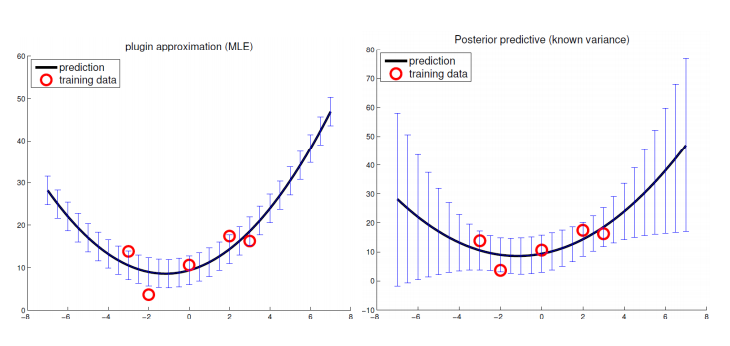

In [2]:
Image(filename = PATH + "mle_vs_bayesian.png", width=800, height=200)

No escape: fundamental law of probability is **Bayes Rule**: $P(A \rvert B) = \frac{P(B \rvert A) P(A)}{P(B)}$: it enables us to **reverse probabilities**. Bayesian inference is a key concept when studying human and animal perceptions. Parsing this formula further:

$\underset{joint distribution}{P(A \rvert B)} = \frac {\underset{conditional}{P(B \rvert A) P(A)}} {\underset{marginal}{P(B)}}$

$\int P(AB) \hspace{2mm} dA \hspace{2mm} dB = 0$ Integral is 1

$\int P(A \rvert B) \hspace{2mm} dA =1 $

$\int P(A) \hspace{2mm} dA = 1$

In order to get the marginal from a joint distribution we integrate P(AB) 
$P(A) = \int P(AB) dB$

The Bayesian approach, as you might expect, begins and ends with probabilities. It recognizes that what we fundamentally want to compute is our knowledge of the parameters in question. The process of Bayesian Inference is that we have a hypothesis in our head, making observations and updating our hypothesis based on the new observations that we have seen. 

The above formula is not unique to Bayesian inference: it is a mathematical fact with uses outside Bayesian inference. Bayesian inference merely uses it to connect prior probabilities $P(A)$ with an updated posterior probabilities $P(A | B )$.

**Bayesian learning for model parameters**

- Step1) Given N data, $ D = X_{1:n} = X_{1}, X_{1}, ..., X_{n} = \left\{ X_{1}, X_{2}, ... X_{n} \right\} $ write down the expression for the likelihood $P(D\rvert\theta)$ where likelihood is the probability of the model parameters, given the data.
- step2) Specify a prior $P(\theta)$. This indicates: 
    - A) the **uncertainty of he parameters**, thereby indicating that our beliefs in the parameters are subjective. There is no such thing as a $\theta_{0}$ in case of $\inf$ and $\theta$ is a random variable. For maximum likelihood $\theta$ is NOT a random variable but the randomness is in the data. In Bayesian Inference, we are putting a distribution to the $\theta$, thereby acknowledging there is uncertainty.
    
    -B) the prior distribution can also indicate a minimal belief. We choose the priro that encodes my beliefs about the problem. By new observations are then updates beliefs about the problem. 
    
    C) By every new observation we update our belief and that will give the **posterior distribution**
    $P(\theta \rvert D) = \frac {P(D \rvert \theta) \hspace{2mm} P(\theta)} {p(D)} \propto \hspace{1mm} P(D \rvert \theta)P(\theta)$ calculated by multiplying the likelihood x the parameters.

** Bayesian linear regression**

In a Bayesian framework, linear regression is stated in a probabilistic manner. That is, we reformulate the above linear regression model to use probability distributions.

The likelihood is Gaussian $\mathcal{N}(y \rvert X\theta, \sigma^{2} \mathcal{I}_{n})$. Now we add a prior $P(\theta) = \mathcal{N}(\theta \rvert \theta_{0}, \mathcal{V}_{0})$

Using Bayes Rules for Gaussians, the posterior is given by:

$\underset{posterior distr.}{p(\theta \rvert X, y, \sigma^{2})} \propto \underset{prior}{\mathcal{N}(\theta \rvert \theta_{0}, \mathcal{V}_{0})} \hspace{1mm} \underset{likelihood}{\mathcal{N}(y \rvert X\theta, \sigma^{2} \mathcal{I}_{n})} = \mathcal{N}(\theta \rvert \theta_{n}, \mathcal{V}_{n})$

In words, our response datapoints y are sampled from a multivariate normal distribution that has a mean equal to the product of the $\theta$ coefficients and the predictors, X, and a variance of σ2. Here, $\mathcal{I}_{n}$ refers to the identity matrix, which is necessary because the distribution is multivariate.

$\theta_{n} = \mathcal{V}_{n}\mathcal{V}_{0}^{-1} \theta_{0} + \frac {1} {\sigma^{2}} \mathcal{V}_{n} X^{T}y$

$\mathcal{V}_{n}^{-1} = \mathcal{V}_{0}^{-1} + \frac {1} {\sigma^{2}} X^{T}X$

The conjugate prior is also a Gassian with the same shape, so the posterior is also Gaussian. So given the data Y, X and a variance: 

$p(\theta \rvert X, y, \sigma^{2}) \propto P(Y \rvert X_{1}, \theta \sigma^{2})  \hspace{1mm}\underset{prior}{P(\theta)}$

$\propto \mathcal{e}^{\frac{1}{2}(Y-X\theta)^{T}(\sigma^{2}\mathcal{I})^{-1}(Y-X\theta)}$ (likelihood we had for linear regression) $\mathcal{e}^{\frac{1}{2}(\theta-\theta_{0})^{T}\mathcal{V}_{0}^{-1}(\theta - \theta_{0})}$ which is the prior. If we combine those 2 terms and because we know what the integral is, we'll be able to put a **constant** and we should manipulate it in such a way that we end up with a Gaussian. See slide 10/15 in the pdf http://www.cs.ubc.ca/~nando/540-2013/lectures/l5.pdf

**recap** if you have a Gaussian prior and you multiply it times a Gaussian likelihood and normalize, you end up with a Gaussian posterior. The mean of that posterior give you back a ridge regression estimate and when the regularization coefficent vanishes, that takes you back to Linear regression. If your prior is very flat, yu don' t know what's the most likely location of your $\theta$ and if your prior doesn't contain information, you should go back to the answer implied by the likelihood. 
Bayesian formulation is very different to the frequentist approach. In the frequentist setting there is no mention of probability distributions for anything other than the measurement error. In the Bayesian formulation the entire problem is recast such that the Y values are samples from a normal distribution.

Big advantage of the Posterior Distributions: the frequentist MLE value for our regression coefficients, $\hat\theta $, is only a single point estimate. In the Bayesian formulation we receive an entire probability distribution that characterises our uncertainty on the different $\theta$ coefficients. The immediate benefit of this is that after taking into account any data we can quantify our uncertainty in the $\theta$ parameters via the variance of this posterior distribution. A larger variance indicates more uncertainty.

### Python implementation of Bayesian Linear Regression

Source: http://pymc-devs.github.io/pymc3/notebooks/getting_started.html

Approach here is to use numpy, pandas to simulate the data, use seaborn to plot, and ultimately use the **Generalised Linear Models (GLM) module of PyMC3** to formulate a Bayesian linear regression and sample from it, on our simulated data set. 

A Generalised Linear Model (GLM) is a flexible mechanism for extending ordinary linear regression to more general forms of regression, including logistic regression (classification) and Poisson regression (used for count data), as well as linear regression itself. GLMs allow for response variables that have error distributions other than the normal distribution. The linear model is related to the response/outcome, Y, via a "link function", and is assumed to be generated from a statistical distribution from the exponential distribution family. (encompasses many common distributions including the normal, gamma, beta, chi-squared, Bernoulli, Poisson).

Since we are constructing a Bayesian model, **the unknown variables in the model must be assigned a prior distribution**. We choose zero-mean normal priors with variance of 100 for both regression coefficients, which corresponds to weak information regarding the true parameter values. We choose a half-normal distribution (normal distribution bounded at zero) as the prior for $\sigma$

In [10]:
import pymc3 as pm

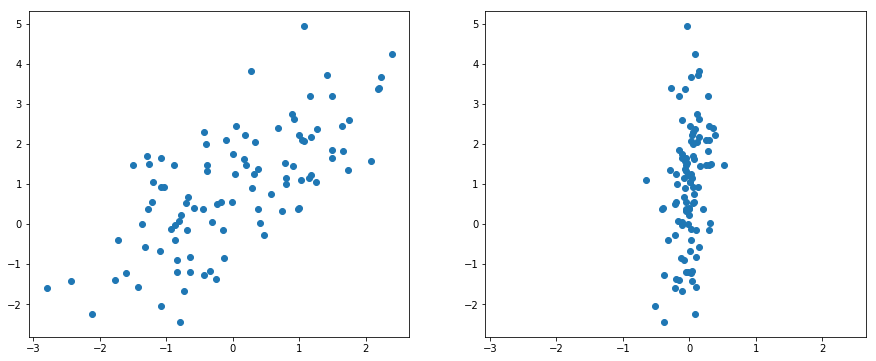

In [9]:
# initialize random numbers
np.random.seed(123)

# true parameters
alpha, sigma = 1,1
beta = [1, 2.5]

N = 100 # size of the dataset

# predictor variables
X1 = np.random.randn(N)
X2 = np.random.randn(N) * 0.2

# simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + np.random.randn(N) * sigma

#plot
fig, ax = plt.subplots(1,2, sharex=True, figsize =[15,6])
ax[0].scatter(X1, Y)
ax[1].scatter(X2, Y)

In [14]:
# create container for model random variables
basic_model = pm.Model()

with basic_model:
    
    #priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    sigma = pm.HalfNormal('sigma', sd=1)
    
    # having defined the priors, the expected value mu of outcomes specifying the linear relation
    mu = alpha + beta[0] *X1 + beta[1] * X2
    
    # likelihood (sampling distribution) of observations
    y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed = Y)

The 'observed' argument, passes data to the variable, indicating that the values for this variable were observed, and should not be changed by any fitting algorithm applied to the model. 

Having completely specified our model, the next step is to **obtain posterior estimates for the unknown variables in the model**. Ideally, we could calculate the posterior estimates analytically, but for most non-trivial models, this is not feasible. We will consider two approaches, whose appropriateness depends on the structure of the model and the goals of the analysis: finding the maximum a posteriori (MAP) point using optimization methods, and computing summaries based on samples drawn from the posterior distribution using Markov Chain Monte Carlo (MCMC) sampling methods.

- 1) The **maximum a posteriori (MAP)** estimate for a model, is the mode of the posterior distribution and is generally found using numerical optimization methods. This is often fast and easy to do, but only gives a point estimate for the parameters and can be biased if the mode isn’t representative of the distribution. Though finding the MAP is a fast and easy way of obtaining estimates of the unknown model parameters, it is limited because there is no associated estimate of uncertainty produced with the MAP estimates. 

In [15]:
map_estimate = pm.find_MAP(model = basic_model)

Optimization terminated successfully.
         Current function value: 149.017982
         Iterations: 16
         Function evaluations: 21
         Gradient evaluations: 21


In [16]:
map_estimate

{'alpha': array(0.9065985497559482),
 'beta': array([ 0.94848602,  2.60705514]),
 'sigma_log__': array(-0.03278147017403045)}

- 2) a simulation-based approach such as **Markov chain Monte Carlo (MCMC)** can be used to obtain a Markov chain of values that, given the satisfaction of certain conditions, are indistinguishable from samples from the posterior distribution. To conduct MCMC sampling to generate posterior samples in PyMC3, we specify a step method object that corresponds to a particular MCMC algorithm, such as Metropolis, Slice sampling, or the No-U-Turn Sampler (NUTS)

PyMC3’s most capable step method is the **No-U-Turn Sampler**. NUTS is especially useful on models that have many continuous parameters, a situation where other MCMC algorithms work very slowly. **It takes advantage of information about where regions of higher probability are, based on the gradient of the log posterior-density. This helps it achieve dramatically faster convergence on large problems than traditional sampling methods achieve**

NUTS requires a scaling matrix parameter, which is analogous to the variance parameter for the jump proposal distribution in Metropolis-Hastings, although NUTS uses it somewhat differently. The matrix gives the rough shape of the distribution so that NUTS does not make jumps that are too large in some directions and too small in other directions. It is important to set this scaling parameter to a reasonable value to facilitate efficient sampling. 

Fortunately PyMC3 automatically initializes NUTS using another inference algorithm called **ADVI (auto-diff variational inference)**. If you don't specify a sampler via the *step* keyword, PyMC3 automatically assigns NUTS and ADVI:

In [17]:
from scipy import optimize

with basic_model:
    # draw 500 posterior samples
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 154.13:   7%|▊           | 13698/200000 [02:37<38:35, 80.47it/s]
Convergence archived at 13700
Interrupted at 13,700 [6%]: Average Loss = 226.6
100%|██████████████████████████████████████| 1000/1000 [01:26<00:00, 11.56it/s]


In [18]:
# trace object contains the samples collected with varnames ['alpha', 'beta', 'sigma_log__', 'sigma']
trace

<MultiTrace: 1 chains, 500 iterations, 4 variables>

In [23]:
trace['alpha'][-5:]

array([ 0.90440178,  0.89622548,  0.84447965,  0.97618376,  0.83744677])

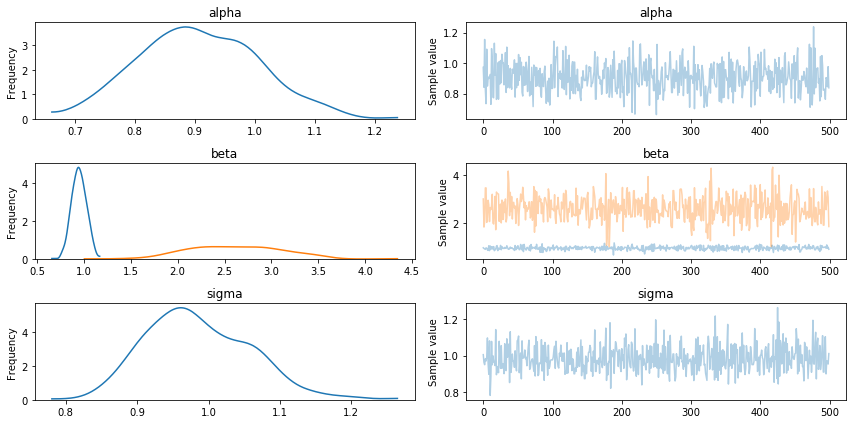

In [25]:
# for the posterior analysis PyMC3 provides summarization plots:
pm.traceplot(trace);

The left column consists of a smoothed histogram (using kernel density estimation) of the marginal posteriors of each stochastic random variable while the right column contains the samples of the Markov chain plotted in sequential order. Beta produces 2 histograms  2 sample traces corresponding to both predictor coefficients. Note that the values for Beta are very close to 1, 2.5 , close to the true parameters of the model.

In addition, we can see that the MCMC sampling procedure has "converged to the distribution" since the sampling series looks stationary (plots at the right)

In [26]:
# summary function for text-based summary:
pm.summary(trace)


alpha:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.907            0.098            0.004            [0.725, 1.105]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.724          0.838          0.900          0.976          1.105


beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.946            0.078            0.003            [0.805, 1.104]
  2.617            0.532            0.019            [1.685, 3.604]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.796          0.893          0.943          0.999          1.100
  1.613          2.243          2.600   

### A Classic: the flip coin

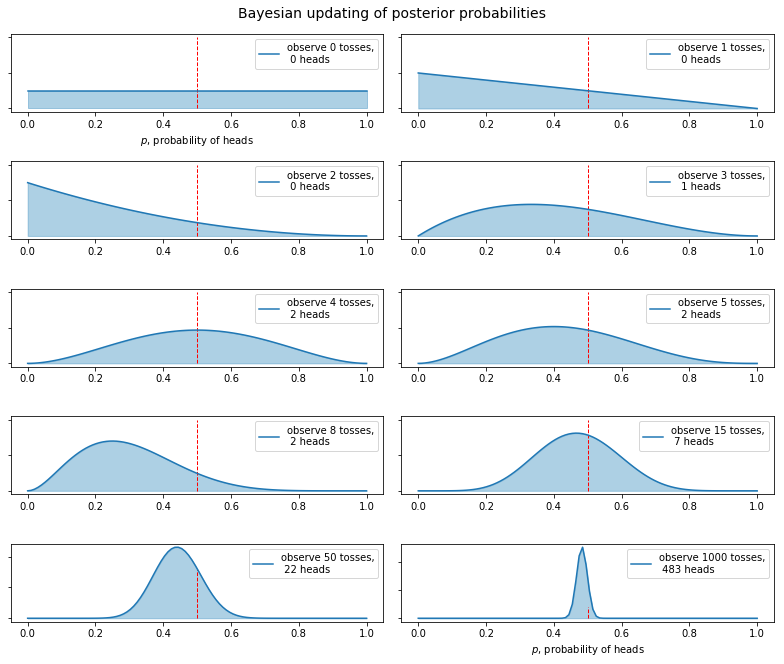

In [100]:
dist = stats.beta # beta continuous random variable
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 1000]
data= stats.bernoulli.rvs(.5, size= n_trials[-1]) # random variates from Bernoulli distribution
x = np.linspace(0, 1, 100)

fig, axes = plt.subplots(5, 2, sharex = False, figsize = [11,9])
axes = axes.flatten()

for k, N in enumerate(n_trials):
    
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    axes[k].plot(x, y, label="observe {} tosses,\n {} heads".format(N, heads))
    axes[k].fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    axes[k].vlines(0.5, 0, 4, color="red", linestyles="--", lw=1)
    axes[k].set(xlabel = (("$p$, probability of heads") if k in [0, len(n_trials) - 1] else ' '), 
                yticklabels= [])
    axes[k].legend(loc = 'upper right')

fig.suptitle("Bayesian updating of posterior probabilities", y=1.02, fontsize=14)
fig.tight_layout()

The posterior probabilities are represented by the curves, and our uncertainty is proportional to the width of the curve. As the plot above shows, as we start to observe more data our posterior probabilities start to shift and move around. Eventually, as we observe more and more data, probabilities will tighten closer and closer around the true value of $p=0.5$ (marked by a dashed line).